# **ETL of Electronic Sales**

## Objectives

*  Extract CSV from Kaggle, Explore the data, and Transform/Clean the data and save into a new CSV.

## Inputs

* Electronic_sales.csv

## Outputs

* Electronic_sales_cleaned.csv




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\electronic_sales_project\\Electronic_Sales\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\electronic_sales_project\\Electronic_Sales'

# Section 1

Loading and Exploring the Dataset:

In [5]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from feature_engine.imputation import CategoricalImputer
import matplotlib.pyplot as plt

Read the raw dataset:

In [6]:
df = pd.read_csv('dataset/raw/Electronic_sales.csv')

In [7]:
df #shows first and last 5 values

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [8]:
df.info() # Displays a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [9]:
df.shape  # (rows, columns)

(20000, 16)

Exploring the data:

In [10]:
# Display the number of unique items in 'Product Type'
unique_product_types = df['Product Type'].nunique()
print(f"Number of unique items in Product Type: {unique_product_types}")

Number of unique items in Product Type: 5


In [11]:
# List the unique items in 'Product Type'
print(df['Product Type'].unique())

['Smartphone' 'Tablet' 'Laptop' 'Smartwatch' 'Headphones']


In [12]:
# Count how many times each product type appears
product_counts = df['Product Type'].value_counts()

# Print from most to least common
print(product_counts)

Product Type
Smartphone    5978
Tablet        4104
Laptop        3973
Smartwatch    3934
Headphones    2011
Name: count, dtype: int64


View in a visual form:

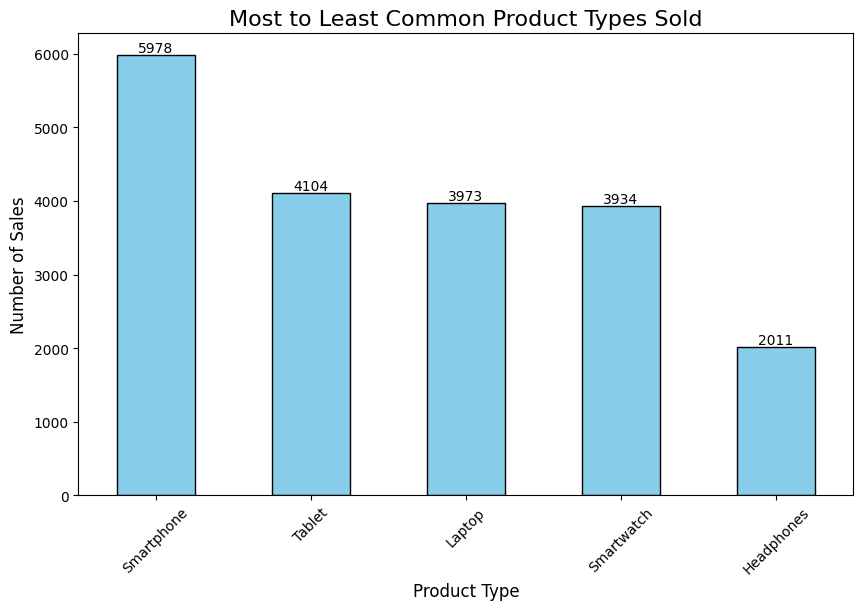

In [13]:
# Plot a bar chart of product type counts
plt.figure(figsize=(10,6))  # Set the figure size for the plot
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # Create a bar chart with custom colors
plt.title('Most to Least Common Product Types Sold', fontsize=16)  # Set the chart title and font size
plt.xlabel('Product Type', fontsize=12)  # Set the x-axis label and font size
plt.ylabel('Number of Sales', fontsize=12)  # Set the y-axis label and font size
plt.bar_label(plt.gca().containers[0]) # Shows the amount on-top
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

Quantity is a factor so I want to see total items sold.

In [14]:
# Sum quantity for each product type
product_sales = df.groupby('Product Type')['Quantity'].sum()

# Sort from most to least sold
product_sales = product_sales.sort_values(ascending=False)

# Print result
print(product_sales)

Product Type
Smartphone    32660
Tablet        22653
Smartwatch    21631
Laptop        21584
Headphones    11183
Name: Quantity, dtype: int64


View in a visual form:

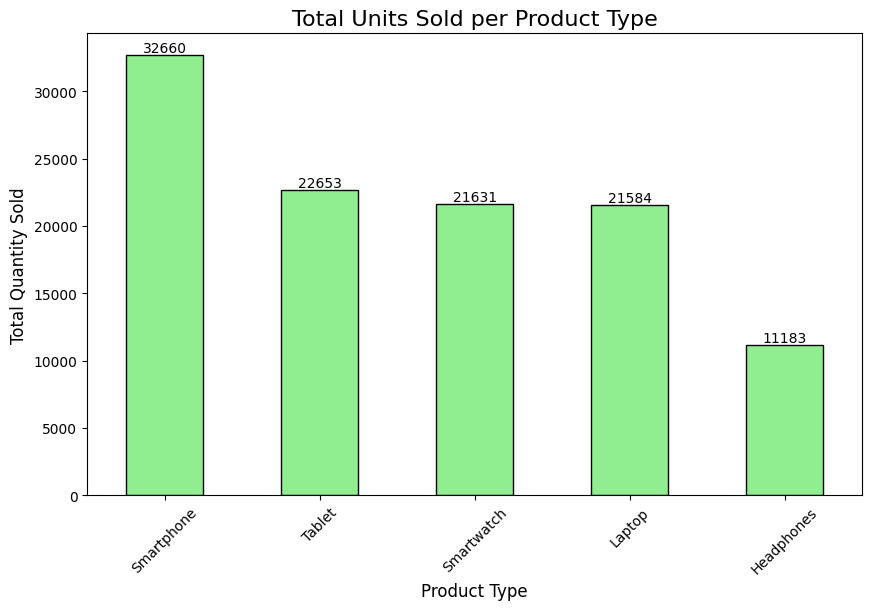

In [15]:
# Plot a bar chart of total units sold per product type
plt.figure(figsize=(10,6))  # Set the figure size for the plot
product_sales.plot(kind='bar', color='lightgreen', edgecolor='black')  # Create a bar chart with custom colors
plt.title('Total Units Sold per Product Type', fontsize=16)  # Set the chart title and font size
plt.xlabel('Product Type', fontsize=12)  # Set the x-axis label and font size
plt.ylabel('Total Quantity Sold', fontsize=12)  # Set the y-axis label and font size
plt.bar_label(plt.gca().containers[0]) # Shows the amount on-top
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

The amount of times smartwatches were sold were lower but the quantity showed that more smartwatches were sold in total.


In [16]:
# Sort the DataFrame by 'Total Price' from large to small
df_total_price_sorted = df.sort_values(by='Total Price', ascending=False)
df_total_price_sorted # First 5 and last 5 values

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
15523,15955,61,Male,No,Smartphone,SMP234,3,Completed,Bank Transfer,11396.80,1139.68,10,2024-04-16,Same Day,NaN,0.00
12562,13214,36,Female,No,Smartphone,SMP234,2,Completed,Credit Card,11396.80,1139.68,10,2024-09-11,Standard,Extended Warranty,30.88
12409,13074,49,Female,No,Smartphone,SMP234,2,Completed,Credit Card,11396.80,1139.68,10,2024-09-19,Same Day,NaN,0.00
12410,13075,20,Female,No,Smartphone,SMP234,2,Completed,Credit Card,11396.80,1139.68,10,2024-07-22,Same Day,Accessory,24.66
18261,18427,18,Male,No,Smartphone,SMP234,1,Completed,PayPal,11396.80,1139.68,10,2024-04-12,Same Day,"Accessory, Accessory",75.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7640,7900,21,Male,No,Smartphone,SKU1001,5,Completed,Paypal,20.75,20.75,1,2023-12-20,Express,"Accessory,Extended Warranty,Extended Warranty",88.57
772,1684,38,Female,Yes,Smartphone,SKU1001,5,Completed,Cash,20.75,20.75,1,2024-01-19,Standard,Extended Warranty,33.11
7623,7887,19,Female,No,Smartphone,SKU1001,5,Completed,Debit Card,20.75,20.75,1,2024-03-23,Overnight,"Impulse Item,Impulse Item,Impulse Item",44.56
4295,4858,39,Female,No,Smartphone,SKU1001,5,Cancelled,Cash,20.75,20.75,1,2024-06-10,Overnight,NaN,0.00


Focusing on Missing values:

In [17]:
df[['Add-ons Purchased', 'Add-on Total']].head(50) # Checking For a link between these columns

,Add-ons Purchased,Add-on Total
0,"Accessory,Accessory,Accessory",40.21
1,Impulse Item,26.09
2,NaN,0.00
3,"Impulse Item,Impulse Item",60.16
4,Accessory,35.56
5,"Impulse Item,Accessory",65.78
6,NaN,0.00
7,"Extended Warranty,Extended Warranty",75.33
8,Impulse Item,43.05
9,NaN,0.00


There is a link between the missing values and Add-on Total. Missing values here are due to a customer not adding any add-ons when buying a product. To fill these missing values I will add a new type named "None Purchased" in Section 2. 

Next missing value:

In [18]:
# Boolean mask for missing values
missing_gender = df['Gender'].isnull()

# Print the rows where Gender is missing
print(df[missing_gender])

       Customer ID  Age Gender Loyalty Member Product Type     SKU  Rating  \
19999        19998   27    NaN            Yes       Laptop  LTP123       4   

      Order Status Payment Method  Total Price  Unit Price  Quantity  \
19999    Completed  Bank Transfer       674.32      674.32         1   

      Purchase Date Shipping Type Add-ons Purchased  Add-on Total  
19999    2024-01-29     Expedited               NaN           0.0  


In [19]:
print(df.index[missing_gender].tolist())


[19999]


In Section 2 I will replace the missing value with the most common gender.

In [20]:
df[['Order Status']].head() 

,Order Status
0,Cancelled
1,Completed
2,Completed
3,Completed
4,Completed


Cancelled orders should **NOT** count as sales as the business did not recieve the money. 
Every row where cancelled = true should be deleted when moving onto the data cleaning step as customers never actually purchased the product and therefore would be misleading. I will fix this in Section 2.

In [21]:
df_age_sorted = df.sort_values(by='Age', ascending=False)
df_age_sorted[['Age']] # Shows the upper and lower limit of Age (Check data is realistic)

,Age
10770,80
691,80
10155,80
8174,80
19758,80
...,...
9014,18
9015,18
19563,18
5342,18


The ages are not too high to be unrealistic and the lower limit makes sense as well.

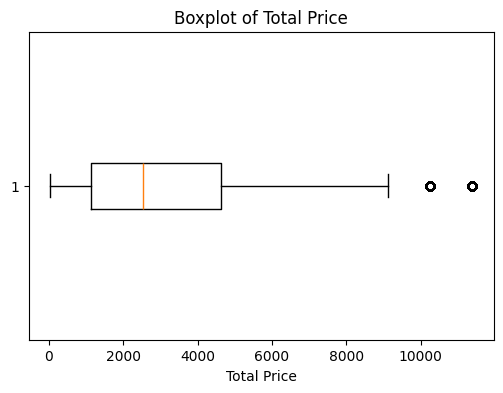

In [22]:
# Checking for outliers in "Total Price"

plt.figure(figsize=(6, 4))
plt.boxplot(df['Total Price'], vert=False)
plt.title('Boxplot of Total Price')
plt.xlabel('Total Price')
plt.show()


Quantity * Unit Price = Total Price

There are outliers in 'Total Price' However they are not actually outliers as the quantity of the item results in the total price being high and is not a result of it being far from the average


In [23]:
df['Quantity'].unique() # Checking the quantity values

array([ 7,  3,  4,  2,  9, 10,  6,  5,  1,  8], dtype=int64)

In [ ]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [24]:
# Find mismatches between Total Price and Quantity * Unit Price
mismatch_mask = ~np.isclose(df['Total Price'], df['Quantity'] * df['Unit Price'], rtol=1e-05)
# Used co-pilot to help the issue of tolerating floating-point errors

# Print the mismatched values only
print(df.loc[mismatch_mask, ['Quantity', 'Unit Price', 'Total Price']])

Empty DataFrame
Columns: [Quantity, Unit Price, Total Price]
Index: []


In [25]:
print(df.index[mismatch_mask].tolist()) 


[]


All Total Prices are correct.

In [26]:
df['Purchase Date'].min(), df['Purchase Date'].max() # Checking if all dates are within 2023 Sep - 2024 Sep

('2023-09-24', '2024-09-23')

All dates are within bounds.

In [27]:
df['Payment Method'].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
       'PayPal'], dtype=object)

There are 2 payment methods named Paypal, one is with 2 capital P (PayPal) and the other is with 1 capital P (Paypal). I will change all of them to "PayPal". I will do this in Section 2

---

# Section 2


Cleaning the Data:

In [28]:
df.isnull().sum() # Focusing on filling or dropping missing values

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

Focusing on filling missing data starting with 'Add-ons Purchased':

In [37]:
df[['Add-ons Purchased', 'Add-on Total']].head() 

,Add-ons Purchased,Add-on Total
0,Impulse Item,26.09
1,NaN,0.00
2,"Impulse Item,Impulse Item",60.16
3,Accessory,35.56
4,"Impulse Item,Accessory",65.78


In [38]:
# Filling missing values with "None Purchased"
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna('None Purchased') # Fill missing values in 'Add-ons Purchased' column with "None Purchased"
df[['Add-ons Purchased', 'Add-on Total']].head(10)

,Add-ons Purchased,Add-on Total
0,Impulse Item,26.09
1,None Purchased,0.00
2,"Impulse Item,Impulse Item",60.16
3,Accessory,35.56
4,"Impulse Item,Accessory",65.78
5,None Purchased,0.00
6,"Extended Warranty,Extended Warranty",75.33
7,None Purchased,0.00
8,"Impulse Item,Accessory,Impulse Item",90.38
9,"Extended Warranty,Impulse Item,Extended Warranty",65.85


In [39]:
df.isnull().sum()

Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64

Fixed but there is still 1 missing value in "Gender" so I will replace the missing value with the most common gender

Focusing on filling the missing value with the most common:

In [40]:
# Create a pipeline for imputing categorical variables
pipeline = Pipeline([
    ('categorical_imputer', CategoricalImputer(
        imputation_method='frequent',   # Replaces NaN with the most frequent value in the column
        variables=['Gender']            # Column to impute
    ))
])

# Fit the pipeline on the dataset and transform it
df = pipeline.fit_transform(df)

# Verify that there are no more missing values in 'gender'
print(df['Gender'].isna().sum())  # Should return 0
print(df['Gender'].value_counts())  # See the distribution after imputation


0
Gender
Male      6781
Female    6651
Name: count, dtype: int64


In [41]:
df.isnull().sum() #Checking for missing Values

Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64

All missing data has been filled (there was no need to drop anything).

Now I will focus on removing all rows that that have an Order Status of "Cancelled"

In [42]:
# Remove rows where order status is "Cancelled"
df = df[df['Order Status'] != 'Cancelled']

# resets the index after dropping rows
df = df.reset_index(drop=True)

print(df['Order Status'].value_counts())

Order Status
Completed    13432
Name: count, dtype: int64


In [35]:
df.head(20) #Verifying only "Completed" orders and now showing

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
1,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
2,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
3,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
4,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
5,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,PayPal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
6,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
7,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00
8,1006,24,Male,Yes,Tablet,SKU1002,3,Completed,PayPal,2470.30,247.03,10,2024-06-25,Overnight,"Impulse Item,Accessory,Impulse Item",90.38
9,1008,66,Female,No,Smartwatch,SKU1003,3,Completed,Cash,3379.32,844.83,4,2023-09-25,Express,"Extended Warranty,Impulse Item,Extended Warranty",65.85


I will now make sure there are no duplicate payment methods with 'Paypal' and 'PayPal'

In [43]:
# Change all values named "Paypal" to "PayPal" in the 'Payment Method' column
df['Payment Method'] = df['Payment Method'].replace('Paypal', 'PayPal')

In [44]:
df['Payment Method'].unique() # Verifying if fixed

array(['PayPal', 'Credit Card', 'Cash', 'Debit Card', 'Bank Transfer'],
      dtype=object)

---

# Section 3

Add a 'Grand Total' column to see the total profits of each order 

In [45]:
# Add 'Total Price' and 'Add-on Total' to create 'Grand Total'
df['Grand Total'] = df['Total Price'] + df['Add-on Total']

# View the first few rows to check
print(df[['Total Price', 'Add-on Total', 'Grand Total']].head())

   Total Price  Add-on Total  Grand Total
0       741.09         26.09       767.18
1      1855.84          0.00      1855.84
2      3164.76         60.16      3224.92
3        41.50         35.56        77.06
4        83.00         65.78       148.78


In [46]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Grand Total
0,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,767.18
1,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None Purchased,0.00,1855.84
2,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,3224.92
3,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,77.06
4,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78,148.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,19995,69,Female,Yes,Laptop,LTP123,3,Completed,Credit Card,5394.56,674.32,8,2024-08-09,Same Day,None Purchased,0.00,5394.56
13428,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,None Purchased,0.00,3419.04
13429,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None Purchased,0.00,6838.08
13430,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,2004.88


---

Load all changes to a new csv in dataset/cleaned:  

In [47]:
df.to_csv('dataset/cleaned/Electronic_sales_cleaned.csv', index=False)